# From Genomes to the Breakpoint Graph

 Instead of using xh and xt to denote the head and tail of synteny block x, we will use the integers 2x and 2x − 1, respectively. As shown below, with this encoding, the original genome (+1 −2 −3 +4) is transformed into the cyclic sequence of nodes (1, 2, 4, 3, 6, 5, 7, 8).  Note that this encoding applies 1-based indexing; you could just as easily label the nodes 0-7, which would produce the cyclic sequence (0, 1, 3, 2, 5, 4, 6, 7).


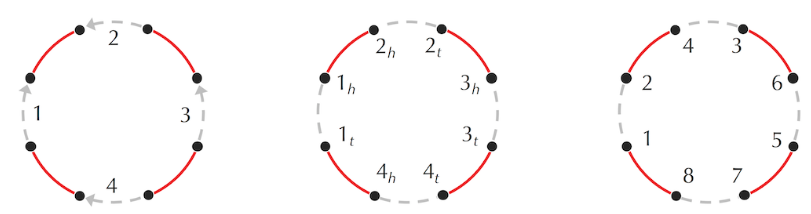



The following pseudocode bypasses the intermediate step of assigning “head” and “tail” nodes in order to transform a single circular chromosome Chromosome = (Chromosome1, . . . , Chromosomen) into a cycle represented as a sequence of integers Nodes = (Nodes1, . . . , Nodes2n).



```
# ChromosomeToCycle(Chromosome)
     for j ← 1 to |Chromosome|
          i ← Chromosomej
          if i > 0
               Nodes2j−1 ←2i−1
               Nodes2j ← 2i
          else
               Nodes2j−1 ← -2i
               Nodes2j ←-2i−1
     return Nodes
```



Code Challenge: Implement ChromosomeToCycle.
- Input: A chromosome Chromosome containing n synteny blocks.
- Output: The sequence Nodes of integers between 1 and 2n resulting from applying ChromosomeToCycle to Chromosome.

In [7]:
def ChromosomeToCycle(Chromosome):
    Nodes = []
    for j in range(len(Chromosome)):
        i = Chromosome[j]
        if i > 0:
            Nodes.append(2 * i - 1)
            Nodes.append(2 * i)
        else:
            Nodes.append(-2 * i)
            Nodes.append(-2 * i - 1)
    return Nodes

def format_output(Nodes):
    # Format the output as required
    return f"({' '.join(map(str, Nodes))})"


Chromosome = [+1, +2, +3, +4, -5, +6, -7, -8, -9, +10, -11, -12, -13, +14, -15, -16, -17, -18, -19, -20, +21, -22, -23, -24, -25, +26, -27, +28, -29, -30, +31, +32, -33, -34, -35, +36, +37, +38, -39, +40, -41, +42, -43, +44, +45, +46, +47, -48, -49, -50, +51, +52, +53, +54, +55, -56, +57, +58, +59, +60]

Nodes = ChromosomeToCycle(Chromosome)
formatted_output = format_output(Nodes)
print(formatted_output)


(1 2 3 4 5 6 7 8 10 9 11 12 14 13 16 15 18 17 19 20 22 21 24 23 26 25 27 28 30 29 32 31 34 33 36 35 38 37 40 39 41 42 44 43 46 45 48 47 50 49 51 52 54 53 55 56 58 57 60 59 61 62 63 64 66 65 68 67 70 69 71 72 73 74 75 76 78 77 79 80 82 81 83 84 86 85 87 88 89 90 91 92 93 94 96 95 98 97 100 99 101 102 103 104 105 106 107 108 109 110 112 111 113 114 115 116 117 118 119 120)


This process is in fact invertible, as described by the following pseudocode.





```
# CycleToChromosome(Nodes)
     for j ← 1 to |Nodes|/2
          if Nodes2j−1 < Nodes2j
               Chromosomej ← Nodes2j /2
          else
               Chromosomej ← −Nodes2j−1/2
     return Chromosome
```





```
# Sample Input:
(1 2 4 3 6 5 7 8)

Sample Output:
(+1 -2 -3 +4)
```



In [16]:
def cycle_to_chromosome(Nodes):
    Chromosome = []
    half = len(Nodes) // 2
    for j in range(half):
        if Nodes[2 * j] < Nodes[2 * j + 1]:
            Chromosome.append(Nodes[2 * j + 1] // 2)
        else:
            Chromosome.append(-Nodes[2 * j] // 2)
    return Chromosome

def format_chromosome(Chromosome):
    formatted = "("
    formatted += " ".join([f"+{x}" if x > 0 else f"{x}" for x in Chromosome])
    formatted += ")"
    return formatted

# Example usage
Nodes = [
    2, 1, 3, 4, 5, 6, 7, 8, 9, 10,
    12, 11, 14, 13, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 26, 25, 27, 28, 29, 30,
    32, 31, 33, 34, 35, 36, 38, 37, 40, 39,
    41, 42, 43, 44, 46, 45, 48, 47, 50, 49,
    52, 51, 53, 54, 56, 55, 57, 58, 60, 59,
    62, 61, 63, 64, 66, 65, 67, 68, 70, 69,
    71, 72, 74, 73, 75, 76, 77, 78, 80, 79,
    81, 82, 83, 84, 86, 85, 88, 87, 90, 89,
    91, 92, 94, 93, 96, 95, 97, 98, 99, 100,
    102, 101, 104, 103, 106, 105, 108, 107, 110, 109,
    112, 111, 113, 114, 116, 115, 118, 117, 119, 120,
    122, 121, 124, 123, 125, 126, 127, 128
]

Chromosome = cycle_to_chromosome(Nodes)
formatted_output = format_chromosome(Chromosome)
print(formatted_output)


(-1 +2 +3 +4 +5 -6 -7 +8 +9 +10 +11 +12 -13 +14 +15 -16 +17 +18 -19 -20 +21 +22 -23 -24 -25 -26 +27 -28 +29 -30 -31 +32 -33 +34 -35 +36 -37 +38 +39 -40 +41 +42 -43 -44 -45 +46 -47 -48 +49 +50 -51 -52 -53 -54 -55 -56 +57 -58 -59 +60 -61 -62 +63 +64)


The following algorithm constructs ColoredEdges(P) for a genome P. In this pseudocode, we will assume that an n-element array (a1, . . . , an) has an invisible (n + 1)-th element that is equal to its first element, i.e., an+1 = a1.



```
# ColoredEdges(P)
     Edges ← an empty set
     for each chromosome Chromosome in P
          Nodes ← ChromosomeToCycle(Chromosome)
          for j ← 1 to |Chromosome|
               add the edge (Nodes2j, Nodes2j +1) to Edges
     return Edges
```



Code Challenge: Implement ColoredEdges.
- Input: A genome P.
- Output: The collection of colored edges in the genome graph of P in the form (x, y).

Sample Input:
(+1 -2 -3)(+4 +5 -6)

Sample Output:
(2, 4), (3, 6), (5, 1), (8, 9), (10, 12), (11, 7)

In [14]:
def genome_list(genome):
    genome_list = []
    # Split the genome by the opening parenthesis to get chromosomes
    for p in genome.split('(')[1:]:
        # Convert the chromosome string into a list of integers
        chromosome = list(map(int, p.strip('()').split()))
        genome_list.append(chromosome)
    return genome_list


def coloredEdges(genome):
    edges = set()
    for chromosome in genome:
        # Convert each chromosome to its cycle representation
        nodes = ChromosomeToCycle(chromosome)
        # Add the first node to the end to create a cycle
        nodes.append(nodes[0])

        # Create edges by pairing adjacent nodes
        for j in range(len(chromosome)):
            edges.add((nodes[2 * j + 1], nodes[2 * j + 2]))  # Add the edges
    return edges

# Sample Input
genome_str = "(+1 -2 -3 -4 -5 +6 -7 +8 +9 -10 -11 -12 +13 +14 +15 -16 -17 +18 -19 -20 +21 -22 +23)" \
             "(+24 +25 -26 -27 +28 +29 -30 -31 +32 +33 +34 -35 +36 +37 +38 -39 -40 +41 -42 +43 -44 -45 +46 +47 -48 -49)" \
             "(-50 -51 +52 -53 +54 +55 -56 +57 -58 +59 -60 -61 +62 +63 -64 -65 -66 -67 -68 -69 +70)" \
             "(+71 +72 +73 +74 -75 +76 -77 -78 -79 -80 +81 +82 +83 -84 +85 +86 +87 -88 +89 +90 +91 -92 -93 +94 +95)" \
             "(-96 +97 -98 +99 +100 -101 +102 -103 +104 +105 -106 +107 +108 -109 -110 -111 +112 +113 -114 +115 +116 -117 -118 -119)" \
             "(+120 +121 -122 +123 -124 +125 +126 +127 +128 +129 +130 -131 +132 +133 -134 -135 -136 +137 -138 +139 -140 -141 -142 +143 +144 +145 -146 +147 +148 +149)" \
             "(+150 -151 +152 -153 +154 +155 -156 +157 +158 +159 -160 +161 -162 +163 -164 -165 -166 +167 -168 -169 +170 +171 +172 -173 -174 +175)" \
             "(-176 -177 -178 -179 +180 -181 -182 -183 +184 +185 +186 +187 +188 -189 -190 -191 +192 -193 +194 +195 +196 -197 +198 +199 +200 -201 +202 -203 +204 -205 -206)" \
             "(+207 +208 -209 +210 +211 +212 -213 -214 +215 +216 -217 -218 +219 -220 +221 -222 -223 -224 -225 +226 -227 -228 +229 -230 +231 -232)"

# Convert the string representation to a list of permutations
genome = genome_list(genome_str)
edges = coloredEdges(genome)

# Format the output as specified
formatted_edges = ', '.join(f'({x}, {y})' for x, y in sorted(edges))
print(formatted_edges)  # Print the edges in the desired format


(2, 4), (3, 6), (5, 8), (7, 10), (9, 11), (12, 14), (13, 15), (16, 17), (18, 20), (19, 22), (21, 24), (23, 25), (26, 27), (28, 29), (30, 32), (31, 34), (33, 35), (36, 38), (37, 40), (39, 41), (42, 44), (43, 45), (46, 1), (48, 49), (50, 52), (51, 54), (53, 55), (56, 57), (58, 60), (59, 62), (61, 63), (64, 65), (66, 67), (68, 70), (69, 71), (72, 73), (74, 75), (76, 78), (77, 80), (79, 81), (82, 84), (83, 85), (86, 88), (87, 90), (89, 91), (92, 93), (94, 96), (95, 98), (97, 47), (99, 102), (101, 103), (104, 106), (105, 107), (108, 109), (110, 112), (111, 113), (114, 116), (115, 117), (118, 120), (119, 122), (121, 123), (124, 125), (126, 128), (127, 130), (129, 132), (131, 134), (133, 136), (135, 138), (137, 139), (140, 100), (142, 143), (144, 145), (146, 147), (148, 150), (149, 151), (152, 154), (153, 156), (155, 158), (157, 160), (159, 161), (162, 163), (164, 165), (166, 168), (167, 169), (170, 171), (172, 173), (174, 176), (175, 177), (178, 179), (180, 181), (182, 184), (183, 186), (185

The colored edges in the breakpoint graph of P and Q are given by ColoredEdges(P) together with ColoredEdges(Q). Note that some edges in these two sets may connect the same two nodes, which results in trivial cycles.
Although we are now ready to solve the 2-Break Distance Problem, we will later find it helpful to implement a function converting a genome graph back into a genome.

Code Challenge: Implement GraphToGenome.

- Input: The colored edges ColoredEdges of a genome graph.
- Output: The genome P corresponding to this genome graph.



```
# GraphToGenome(GenomeGraph)
     P ← an empty set of chromosomes
     for each cycle Nodes in GenomeGraph
          Nodes ← sequence of nodes in this cycle (starting from node 1)
          Chromosome ← CycleToChromosome(Nodes)
          add Chromosome to P
     return P
```
Sample Input: (2, 4), (3, 6), (5, 1), (7, 9), (10, 12), (11, 8)

Sample Output: (+1 -2 -3)(-4 +5 -6)


In [27]:
def graph_to_genome(genome_edges):
    chromosomes = []
    cycles = []
    current_cycle = []

    # Loop through the edges to group them into cycles
    for i in range(len(genome_edges)):
        current_cycle += list(genome_edges[i])  # Add current edge to the temporary cycle

        # Check if the next edge continues the current cycle
        if i < len(genome_edges) - 1:
            if genome_edges[i][1] == genome_edges[i + 1][0] + 1 or genome_edges[i][1] == genome_edges[i + 1][0] - 1:
                continue
            else:
                cycles.append(current_cycle)  # Append completed cycle to cycles
                current_cycle = []  # Reset for the next cycle
        else:
            cycles.append(current_cycle)  # Append remaining cycle for the last edge

    # Convert cycles to chromosomes
    for cycle in cycles:
        # The cycle is created as a sequence, adding the first node to the end to close it
        chromosome = cycle_to_chromosome([cycle[-1]] + cycle)  # Close the cycle by adding the first node at the end
        chromosomes.append(chromosome)

    return chromosomes

# Example Usage
genome_graph = [(2, 4), (3, 6), (5, 1), (7, 9), (10, 12), (11, 8)]
result = graph_to_genome(genome_graph)

# Format the result for output with each chromosome on a new line
formatted_result = '\n'.join(['(' + ' '.join(f'+{x}' if x > 0 else f'{x}' for x in chromosome) + ')' for chromosome in result])
print(formatted_result)


(+1 -2 -3)
(-4 +5 -6)
